In [20]:
import json
import time
import pandas as pd
import requests
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import quandl
from config import api_key
import csv
import os

In [2]:
master_data_path = os.path.join("..", "..", "data", "project_one_data", "master_data_cleaned.csv")
master_data_df = pd.read_csv(master_data_path)
master_data_df.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.0,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.0,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.0,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.0,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.0,30566.0,3.5,3.88,3.66


In [5]:
sssm_df = master_data_df[master_data_df["Indicator ID"] =="SSSM"]
sssm_df

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
411,2016,Apr,2016-4,4/30/2016,4/28/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",249350.0,689481.0,3.5,3.88,3.66
558,2016,May,2016-5,5/31/2016,5/5/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",254975.0,689481.0,3.4,3.75,3.61
559,2016,May,2016-5,5/31/2016,5/12/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",254975.0,689481.0,3.4,3.75,3.57
560,2016,May,2016-5,5/31/2016,5/19/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",254975.0,689481.0,3.4,3.88,3.58
561,2016,May,2016-5,5/31/2016,5/26/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394484,metro,"Colorado Springs, CO",254975.0,689481.0,3.4,3.88,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66065,2020,Jul,2020-7,7/31/2020,7/30/2020,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",383795.0,332367.0,7.4,3.00,2.99
66552,2020,Aug,2020-8,8/31/2020,8/6/2020,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",386667.0,332367.0,6.7,3.00,2.88
66553,2020,Aug,2020-8,8/31/2020,8/13/2020,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",386667.0,332367.0,6.7,3.00,2.96
66554,2020,Aug,2020-8,8/31/2020,8/20/2020,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",386667.0,332367.0,6.7,2.88,2.99


In [9]:
sssm_df_greely = sssm_df[sssm_df["Region Name"].str.contains("Greeley")]
sssm_df_greely

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
3687,2016,Apr,2016-4,4/30/2016,4/28/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",278367.0,294867.0,3.5,3.88,3.66
3834,2016,May,2016-5,5/31/2016,5/5/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",283626.0,294867.0,3.4,3.75,3.61
3835,2016,May,2016-5,5/31/2016,5/12/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",283626.0,294867.0,3.4,3.75,3.57
3836,2016,May,2016-5,5/31/2016,5/19/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",283626.0,294867.0,3.4,3.88,3.58
3837,2016,May,2016-5,5/31/2016,5/26/2016,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",283626.0,294867.0,3.4,3.88,3.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66065,2020,Jul,2020-7,7/31/2020,7/30/2020,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",383795.0,332367.0,7.4,3.00,2.99
66552,2020,Aug,2020-8,8/31/2020,8/6/2020,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",386667.0,332367.0,6.7,3.00,2.88
66553,2020,Aug,2020-8,8/31/2020,8/13/2020,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",386667.0,332367.0,6.7,3.00,2.96
66554,2020,Aug,2020-8,8/31/2020,8/20/2020,SSSM,"Median Sale Price (Smooth, SFR only, Monthly)",394645,metro,"Greeley, CO",386667.0,332367.0,6.7,2.88,2.99


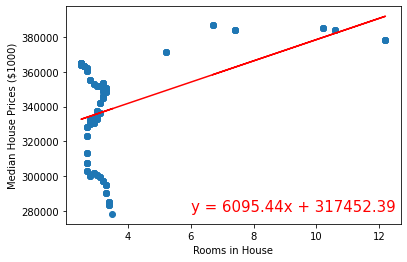

The correlation between the unemployment rate and median sale price value in Greeley, CO is: 0.45025387798069516.
P-Value is: 1.3989027673407872e-12.


In [24]:
sssm_greeley_scatter = sssm_df_greely.plot("Unemployment Rate", "Value", kind="scatter")

# FIND LINEAR REGRESSION
greeley_unem_x = sssm_df_greely["Unemployment Rate"]
greeley_value_y = sssm_df_greely["Value"]

# Formula
(slope, intercept, rvalue, pvalue, stderr) = linregress(greeley_unem_x, greeley_value_y)
greeley_regress_values = greeley_unem_x * slope + intercept

# Line Equation
greeley_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(greeley_unem_x,greeley_value_y)
plt.plot(greeley_unem_x,greeley_regress_values,"r-")

# Design Plot
plt.annotate(greeley_line_eq,(6, 280000),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')

# Show
plt.show()

# Find Correlation
unemployment = sssm_df_greely.iloc[:,12]
saleprice = sssm_df_greely.iloc[:,10]
correlation = st.pearsonr(unemployment,saleprice)
print(f"The correlation between the unemployment rate and median sale price value in Greeley, CO is: {correlation[0]}.")
print(f"P-Value is: {correlation[1]}.")

In [ ]:
# FIND LINEAR REGRESSION
x_values = sssm_df_greely["Unemployment Rate"]
y_values = sssm_df_greely["Value"]



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()